# TFY4345 - Classical Mechanics - Numerical Exercise

### Alexander Arntzen | Knut Andre G. Prestsveen

This is a project in the course TFY4345 "Classical Mechanics" at the Norwegian University of Science and Technology. The notebook studies a simple pendulum, comparing the results of different numerical methods for solving the pendulum's equation of motion.

The source code lies on [GitHub](https://github.com/kaprests/Pendulum).

In [2]:
'''Imports packages, functions and constants'''
# Simple pendulum with Eulers method:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from scipy.constants import g
from scipy.integrate import solve_ivp
from IPython.display import HTML

In [3]:
# Set common figure parameters:
newparams = {'axes.labelsize': 11, 'axes.linewidth': 1, 'savefig.dpi': 300, 
             'lines.linewidth': 1.0, 'figure.figsize': (8, 3),
             'ytick.labelsize': 10, 'xtick.labelsize': 10,
             'ytick.major.pad': 5, 'xtick.major.pad': 5,}
plt.rcParams.update(newparams)

In [4]:
'''Total energy of a pendulum'''
def energies(theta, omg):
    '''
    Calculates the kinetic, potential and total energies of a pendulum.
    
    Input:
        theta: angle between the pendulum and the vertical axis.
        omg: the angular velocity of the pendulum.
    Returns:
        T: the pendulum's kinetic energy.
        V: the pendulum's potential energy.
        E_tot: the pendulum's total energy.
    '''
    T = (1/2)*m*(l**2)*omg**2
    V = m*g*l*(1 - np.cos(theta))
    E_tot = T + V
    return T, V, E_tot

## Simple Pendulum

Here we will study a simple pendulum. We will solve the equation of motion with different numerical methods and compare with tha analytical solution to the small angle approximation case. 

<b>The pendulum has the following properties:</b>

In [5]:
'''Parameters and initial conditiions'''
theta_0 = 0.2 #rad
omg_0 = 0 #rad/s
l = 1.0 #m (meter)
m = 1.0 #kg
sim_time = 10 #s, simulation time
dt = 0.01 # s, timestep
timesteps = int(sim_time/dt) # Number of timesteps
phi = np.pi/2 #when omg_0 =0

### Analytical solution with small angle approximation

Here we implement the analytical solution where the pendulum's equation of motion is approximated with that of a harmonic oscillator.

In [6]:
#Time axis
t_vec = np.linspace(0, sim_time, timesteps)

"""Anlytical method: """
theta_vec_analy = theta_0*np.sin(t_vec*np.sqrt(g/l) + phi)
omg_vec_analy= theta_0*np.cos(t_vec*np.sqrt(g/l) + phi)*np.sqrt(g/l)

### Eulers Method

The first numerical method we implement is the simple Euler algorithm. 

In [7]:
"""Euler method: """
#Functions for Eulers method
def euler_step(theta_vec, omg_vec, i, dt):
    '''
    Performs one euler step
    
    input:
        theta_vec: a vector for storing the angles of the pendulum.
        omg_vec: a vector for storing the angular velocities of the pendulum.
        i: iteration number.
        dt: timestep.
    '''
    omg_vec[i+1] = omg_vec[i] - (g/l)*np.sin(theta_vec[i])*dt
    theta_vec[i+1] = theta_vec[i] + omg_vec[i]*dt


def euler_solve(theta_vec, omg_vec, dt):
    '''
    Iterates through all time steps with the euler_step function.
    
    input:
        theta_vec: a vector for storing the angles of the pendulum.
        omg_vec: a vector for storing the angular velocities of the pendulum.
        i: iteration number.
        dt: timestep. 
    '''
    for i in range(timesteps-1):
        euler_step(theta_vec, omg_vec, i, dt)
        
#Numerical arrays with vals for plotting
omg_vec_euler = np.zeros(timesteps)
theta_vec_euler = np.zeros(timesteps)

# set initial values
omg_vec_euler[0] = omg_0
theta_vec_euler[0] = theta_0

euler_solve(theta_vec_euler, omg_vec_euler, dt)
kin_energy_euler, pot_energy_euler, total_energy_euler = energies(theta_vec_euler, omg_vec_euler)
kin_energy_analy, pot_energy_analy, total_energy_analy = energies(theta_vec_analy, omg_vec_analy)

In [8]:
'''arrays with vals for plotting'''
omg_vec_euler = np.zeros(timesteps)
theta_vec_euler = np.zeros(timesteps)
t_vec = np.linspace(0, sim_time, timesteps)


# set initial values
omg_vec_euler[0] = omg_0
theta_vec_euler[0] = theta_0

### Comparison - Euler method and harmonic oscillator

We now compare the results of the Euler method solution with the analytical approximation.

In [9]:
'''Compute results'''
# Euler results
euler_solve(theta_vec_euler, omg_vec_euler, dt)
kin_energy_euler, pot_energy_euler, total_energy_euler = energies(theta_vec_euler, omg_vec_euler)

# Analytical small angle results
kin_energy_analy, pot_energy_analy, total_energy_analy = energies(theta_vec_analy, omg_vec_analy)

To compare we plot the resulting angles and energies for the two solutions.

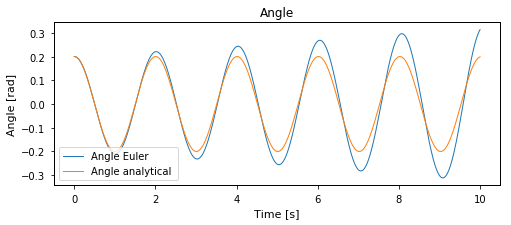

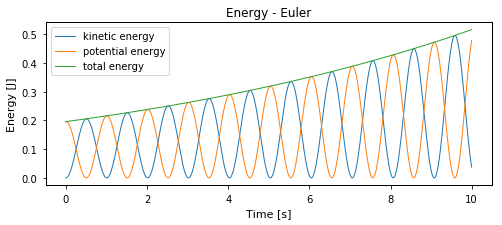

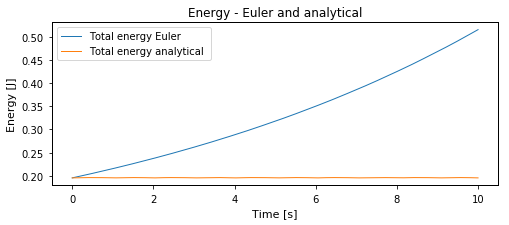

In [10]:
"""plot results"""
plt.plot(t_vec, theta_vec_euler, label = "Angle Euler")
plt.plot(t_vec, theta_vec_analy, label = "Angle analytical ")
plt.xlabel("Time [s]")
plt.ylabel("Angle [rad]")
plt.title("Angle")
plt.legend()
plt.show()

plt.plot(t_vec, kin_energy_euler, label="kinetic energy")
plt.plot(t_vec, pot_energy_euler, label="potential energy")
plt.plot(t_vec, total_energy_euler, label="total energy")
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.title("Energy - Euler")
plt.legend()
plt.show()

plt.plot(t_vec, total_energy_euler, label = "Total energy Euler ")
plt.plot(t_vec, total_energy_analy, label = "Total energy analytical ")
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.title("Energy - Euler and analytical")
plt.legend()
plt.show()

We see that the Euler method is unstable for this oscillatory system, and the amplitude of the pendulum is increasing with each iteration. This is also seen very well in the last plot of the total energy.

### Euler-Cromer method

Then we implement the Euler-Cromer method, which is supposed to yield more stable sollutions to oscillatory problems.

In [11]:
'''Euler-Cromer method: '''
def euler_cromer_step(theta_vec, omg_vec, i, dt):
    '''
    Performs one euler-cromer step
    
    input:
        theta_vec: a vector for storing the angles of the pendulum.
        omg_vec: a vector for storing the angular velocities of the pendulum.
        i: iteration number.
        dt: timestep.
    '''
    omg_vec[i+1] = omg_vec[i] - (g/l)*np.sin(theta_vec[i])*dt
    theta_vec[i+1] = theta_vec[i] + omg_vec[i+1]*dt

    
    
def euler_cromer_solve(theta_vec, omg_vec, dt):
    '''
    Iterates through all time steps with the euler_step function.
    
    input:
        theta_vec: a vector for storing the angles of the pendulum.
        omg_vec: a vector for storing the angular velocities of the pendulum.
        i: iteration number.
        dt: timestep. 
    '''
    for i in range(timesteps-1):
        euler_cromer_step(theta_vec, omg_vec, i, dt)

In [12]:
#New arrays for Euler-Cromer
omg_vec_cromer = np.zeros(timesteps)
theta_vec_cromer = np.zeros(timesteps)

# set initial values
omg_vec_cromer[0] = omg_0
theta_vec_cromer[0] = theta_0

euler_cromer_solve(theta_vec_cromer, omg_vec_cromer, dt)
kin_energy_cromer, pot_energy_cromer, total_energy_cromer = energies(theta_vec_cromer, omg_vec_cromer)

In [13]:
"""Runge-Kutta 4th order"""
# y = [thetea, omega]

def ddt_omg_theta(t, y):
    return [y[1], -(g/l)*np.sin(y[0])]

sol = solve_ivp(ddt_omg_theta, t_span=[0, sim_time], y0=[theta_0, omg_0], max_step = dt )
theta_vec_RK45, omg_vec_RK45 = sol.y[0], sol.y[1]
kin_energy_RK45, pot_energy_RK45, total_energy_RK45 = energies(sol.y[0], sol.y[1])


#### 2.1 
##### Task: 
*plot the angle and and total energy for all three methods as a function of time for several cycles. Use the same time step for all and choose it such that you can see a clear difference with respect to the Euler method. Take into account also computational efficiency aspects! There is no reason to use a very small time step if larger values perform alright.*

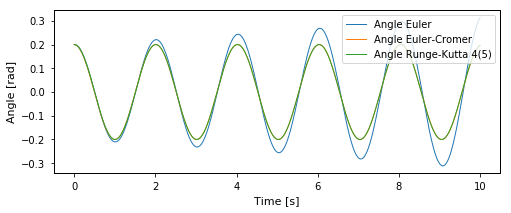

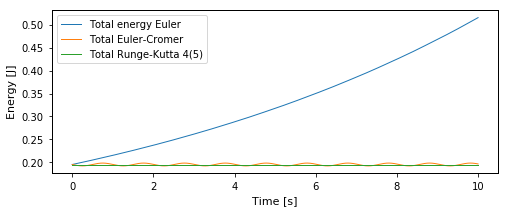

In [14]:

"""plot results"""
plt.plot(t_vec, theta_vec_euler, label = "Angle Euler")
plt.plot(t_vec, theta_vec_cromer, label = "Angle Euler-Cromer")
plt.plot(sol.t, theta_vec_RK45, label = "Angle Runge-Kutta 4(5)")
plt.xlabel("Time [s]")
plt.ylabel("Angle [rad]")
plt.legend()
plt.show()

plt.plot(t_vec, total_energy_euler, label = "Total energy Euler ")
plt.plot(t_vec, total_energy_cromer, label = "Total Euler-Cromer ")
plt.plot(sol.t, total_energy_RK45, label = "Total Runge-Kutta 4(5)")

plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.legend()
plt.show()

We se that the Runge-Kutta method is the best. 

#### 2.2 
##### Task: 
*plot the trajectory in the phase space (i.e. select the angle and velocity as axes in a 2D coordinate system) for all three methods by using the time step above. Run the simulations for several cycles.*

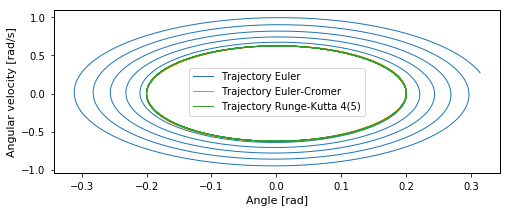

In [15]:
plt.plot(theta_vec_euler, omg_vec_euler, label = "Trajectory Euler")
plt.plot(theta_vec_cromer, omg_vec_cromer, label = "Trajectory Euler-Cromer")
plt.plot(theta_vec_RK45, omg_vec_RK45, label = "Trajectory Runge-Kutta 4(5)")
plt.xlabel("Angle [rad]")
plt.ylabel("Angular velocity [rad/s]")
plt.legend()
plt.show()



#### 2.3
##### Task: 
*Test the effect of varying time step for Euler-Cromer and RK4, respectively. What values lead to satisfactory results in your opinion?*

We now make an energy plot for the Euler-Cromer solution to verify that it yields a more stable solution than the Euler method.

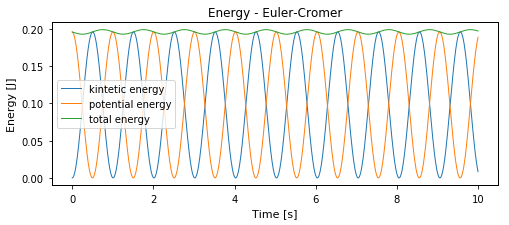

In [16]:
# plot results
plt.plot(t_vec, kin_energy_cromer, label="kintetic energy")
plt.plot(t_vec, pot_energy_cromer, label="potential energy")
plt.plot(t_vec, total_energy_cromer, label="total energy")
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.title("Energy - Euler-Cromer")
plt.legend()
plt.show()

### Runge-Kutta 4th order

Finally we implement the Runge-Kutta method (4th order) from the scipy library. This is a much superior method which yields precise solutions even for much larger time steps than the three methods above. The scipy implementation is adaptive and uses variable time steps, but here we set the max_step=dt so that we use the same time step for all methods in order to get comparable plots.

In [17]:
def ddt_omg_theta(t, y):
    '''
    Function defining the second order differential equation of motion as a pair of 1. order equations.
    
    Input:
        t: time.
        y: array for storing solution values.
    Output:
        A list containing the "right hand side" of the two first order equations.
    '''
    return [y[1], -(g/l)*np.sin(y[0])]

In [18]:
sol = solve_ivp(ddt_omg_theta, [0, sim_time], [theta_0, 0], max_step=dt)
theta_vec_RK45, omg_vec_RK45 = sol.y[0], sol.y[1]
kin_energy_RK45, pot_energy_RK45, total_energy_RK45 = energies(sol.y[0], sol.y[1])

Again an energy plot to see the stability of the solution.

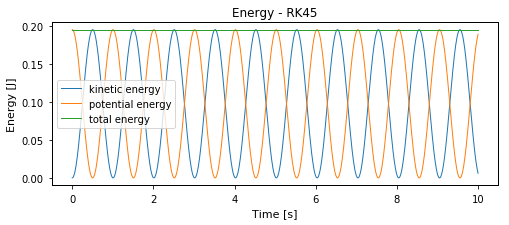

In [19]:
plt.plot(sol.t, kin_energy_RK45, label="kinetic energy")
plt.plot(sol.t, pot_energy_RK45, label="potential energy")
plt.plot(sol.t, total_energy_RK45, label="total energy")
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.title("Energy - RK45")
plt.legend()
plt.show()

### Comparison - Euler, Euler-Cromer and RK45

We now plot the angle and and total energy for all three methods as a function of time for several cycles. As mentioned we use the same time step for all methods, and we have chosen it such that we can see a clear difference with respect to the Euler method.

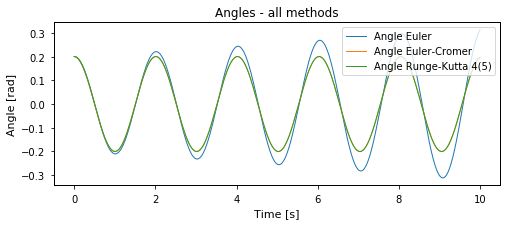

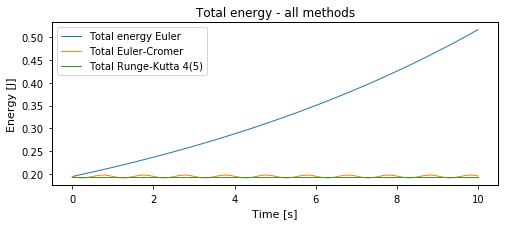

In [20]:
"""plot results"""
plt.plot(t_vec, theta_vec_euler, label = "Angle Euler")
plt.plot(t_vec, theta_vec_cromer, label = "Angle Euler-Cromer")
plt.plot(sol.t, theta_vec_RK45, label = "Angle Runge-Kutta 4(5)")
plt.xlabel("Time [s]")
plt.ylabel("Angle [rad]")
plt.title("Angles - all methods")
plt.legend()
plt.show()

plt.plot(t_vec, total_energy_euler, label = "Total energy Euler ")
plt.plot(t_vec, total_energy_cromer, label = "Total Euler-Cromer ")
plt.plot(sol.t, total_energy_RK45, label = "Total Runge-Kutta 4(5)")
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.title("Total energy - all methods")
plt.legend()
plt.show()

### Trajectory in phase space

We now plot the trajectory in the phase space (i.e. we select the angle and velocity as axes in a 2D coordinate system) for all three methods by using the time step above. The simulations are run for several cycles.

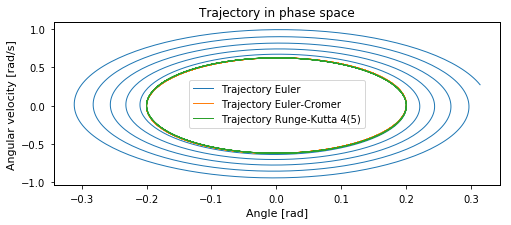

In [21]:
plt.plot(theta_vec_euler, omg_vec_euler, label = "Trajectory Euler")
plt.plot(theta_vec_cromer, omg_vec_cromer, label = "Trajectory Euler-Cromer")
plt.plot(theta_vec_RK45, omg_vec_RK45, label = "Trajectory Runge-Kutta 4(5)")
plt.xlabel("Angle [rad]")
plt.ylabel("Angular velocity [rad/s]")
plt.title("Trajectory in phase space")
plt.legend()
plt.show()

### Different time steps for Euler-Cromer and Runge-Kutta

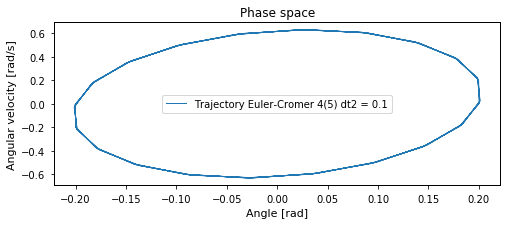

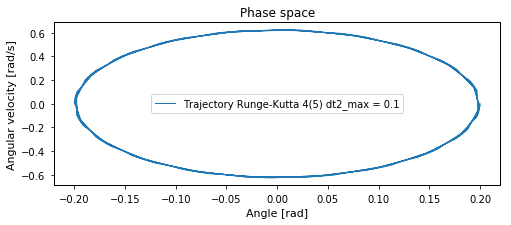

In [22]:
"""Euler-Cromer new dt2"""
dt2 = 0.1
timesteps = int(sim_time/dt2)


#New arrays for Euler-Cromer
omg_vec_cromer2 = np.zeros(timesteps)
theta_vec_cromer2 = np.zeros(timesteps)

# set initial values
omg_vec_cromer2[0] = omg_0
theta_vec_cromer2[0] = theta_0

euler_cromer_solve(theta_vec_cromer2, omg_vec_cromer2, dt2)
kin_energy_cromer2, pot_energy_cromer2, total_energy_cromer2 = energies(theta_vec_cromer2, omg_vec_cromer2)

plt.plot(theta_vec_cromer2, omg_vec_cromer2, label = f"Trajectory Euler-Cromer 4(5) dt2 = {dt2}")
plt.xlabel("Angle [rad]")
plt.ylabel("Angular velocity [rad/s]")
plt.title("Phase space")
plt.legend()
plt.show()

"""Ruge kutta new dt2"""
dt2 = 0.1

sol2 = solve_ivp(ddt_omg_theta, t_span=[0, sim_time], y0=[theta_0, omg_0], max_step = dt2 )
theta_vec_RK452, omg_vec_RK452 = sol2.y[0], sol2.y[1]
kin_energy_RK452, pot_energy_RK452, total_energy_RK452 = energies(sol2.y[0], sol2.y[1])

plt.plot(theta_vec_RK452, omg_vec_RK452, label = f"Trajectory Runge-Kutta 4(5) dt2_max = {dt2}")
plt.xlabel("Angle [rad]")
plt.ylabel("Angular velocity [rad/s]")
plt.title("Phase space")
plt.legend()
plt.show()

By trying different values we find that a timestep of $dt ≤ 0.1$ leads to a resonable solutin for both methods.

### Animation

Finally we make a simple animation of the simple pendulum 

In [23]:
'''Animation'''
# cartesian coordinates of the pendulum tip
timesteps = int(sim_time/dt) # back to the old number of time steps
x = np.sin(theta_vec_RK45)
y = -np.cos(theta_vec_RK45)


# Set up fig and stuff for the animated plot
fig = plt.figure(figsize=(2,2), dpi=60)
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
string, = ax.plot([], [], lw=2)
mass = plt.Circle((x[0], y[0]), 0.05, color='blue')


def init():
    string.set_data([],[])
    ax.add_artist(mass)
    return string,


def animate(i):
    mass.center = (x[i], y[i])
    string.set_data([0, x[i]], [0, y[i]])
    return string, mass


anim = FuncAnimation(fig, animate, init_func=init, frames=timesteps, interval=1000*dt, blit=True)
plt.close(anim._fig)
HTML(anim.to_html5_video())

## Forced harmonic pendulum

In [ ]:
Fd = 0.2
q = 1.0
OmgD = np.sqrt(g/l)


def ddt_omg_forced(theta, omg, t):
    '''1st order equation for omega'''
    return -(g/l)*theta - q*omg + Fd*np.sin(OmgD*t)


def ddt_theta_forced(omg):
    '''1st order equation for theta'''
    return omg


def ddt_omg_theta_forced(t, y):
    '''
    pair of 1st order equations.
    '''
    return [ddt_theta_forced(y[1]) ,ddt_omg_forced(y[0], y[1], t)]


sol_forced = solve_ivp(ddt_omg_theta_forced, [0, sim_time], [theta_0, 0], max_step=dt)
theta_vec_f, omg_vec_f = sol_forced.y[0], sol_forced.y[1]


OmgDs = np.linspace(0, 40, 20)
amplitudes = np.zeros(len(OmgDs))


for i in range(len(OmgDs)):
    OmgD = OmgDs[i]
    sol_forced = solve_ivp(ddt_omg_theta_forced, [0, sim_time], [theta_0, 0], max_step=dt)
    theta_vec_f, omg_vec_f = sol_forced.y[0], sol_forced.y[1]
    equilibrium_thetas = theta_vec_f[(len(theta_vec_f)//2):]
    amplitudes[i] = max(equilibrium_thetas) - min(equilibrium_thetas)


    
def eq_analytical(OmgD):
    return Fd/(np.sqrt((np.sqrt(g/l)**2 - OmgD**2)**2 + (q*OmgD)**2))

'''
kin_energy_f, pot_energy_f, total_energy_f = energies(sol_forced.y[0], sol_forced.y[1])

plt.plot(sol_forced.t, kin_energy_f, label="kinetic energy")
plt.plot(sol_forced.t, pot_energy_f, label="potential energy")
plt.plot(sol_forced.t, total_energy_f, label="total energy")
plt.xlabel("Time [s]")
plt.ylabel("Energy [J]")
plt.title("Energy - _f")
plt.legend()
plt.show()
'''


plt.plot(sol_forced.t, theta_vec_f, label = "Angle forced dampend 4(5)")
plt.show()

plt.plot(OmgDs, amplitudes)
plt.show()

plt.plot(OmgDs, eq_analytical(OmgDs))
plt.show()